In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.font_manager as fm

font_path = "/home/yunsoowoo/.local/share/fonts/NEXON Lv1 Gothic_TTF/NEXONLv1GothicRegular.ttf"  # Your font path goes here
fm.fontManager.addfont(font_path)
plt.rcParams["font.family"] = "NEXON Lv1 Gothic"
plt.rcParams["figure.autolayout"] = True

In [121]:
data = pd.read_csv('data/work_schedule.csv', index_col=0)

In [122]:
data['booting_time'] = pd.to_datetime(data['booting'], format='%H:%M', errors='ignore')
data[data['booting_time'] > pd.to_datetime('11:00', format='%H:%M')] = np.nan

In [150]:
data['goal_time'] = pd.to_datetime(data['goal'], format='%H:%M', errors='ignore')
data['actual_time'] = pd.to_datetime(data['actual'], format='%H:%M', errors='ignore')
data[data['actual_time'] < pd.to_datetime('17:00', format='%H:%M')] = np.nan

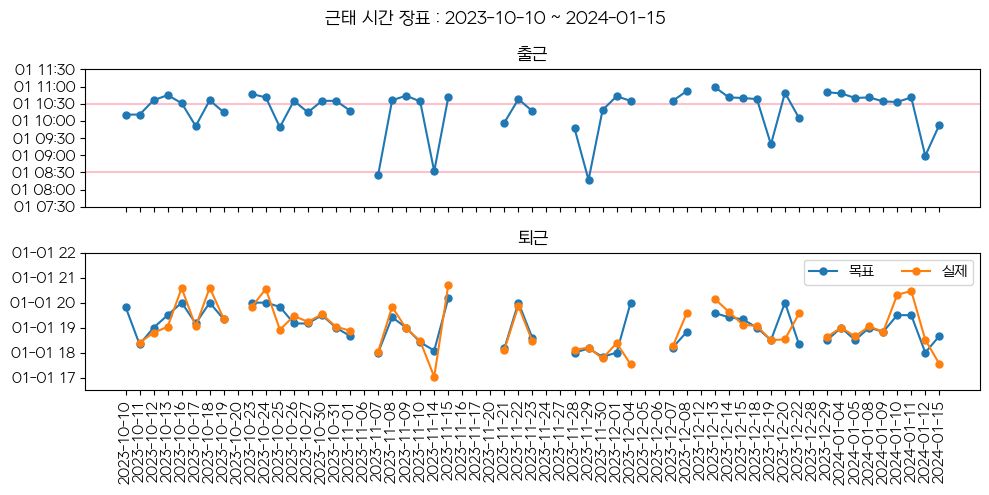

In [178]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(10, 5))
fig.suptitle('근태 시간 장표 : 2023-10-10 ~ 2024-01-15')

axes[0].axhline(pd.to_datetime('10:30', format='%H:%M'), color='pink')
axes[0].axhline(pd.to_datetime('08:30', format='%H:%M'), color='pink')
axes[0].plot(data.index, data.booting_time, '-o', markersize=5)
axes[0].set_ylim([pd.to_datetime('07:30', format='%H:%M'), pd.to_datetime('11:30', format='%H:%M')])
axes[0].set_title('출근')

axes[1].plot(data.index, data.goal_time, '-o', label='목표', markersize=5)
axes[1].plot(data.index, data.actual_time, '-o', label='실제', markersize=5)
axes[1].set_ylim([pd.to_datetime('16:30', format='%H:%M'), pd.to_datetime('22:00', format='%H:%M')])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('퇴근')
axes[1].legend(loc='upper right', ncols=2)

plt.savefig('2023_01_15_근태내역.png')